In [1]:
import cx_Oracle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
conn = cx_Oracle.Connection('pizza/tiger@localhost:1521/xe')

In [5]:
con = conn.cursor()
con.execute('select pizza_category, sum(quantity) as Total_Pizzas_sold from pizza  group by pizza_category')
rows = con.fetchall

pizza = []
Total_pizzas_sold = []

for i in con:
        pizza.append(i[0])
        Total_pizzas_sold.append(i[1])
print('pizza' , pizza)
print('Total_pizzas_sold' , Total_pizzas_sold)

pizza ['Chicken', 'Classic', 'Veggie', 'Supreme']
Total_pizzas_sold [11050, 14888, 11649, 11987]


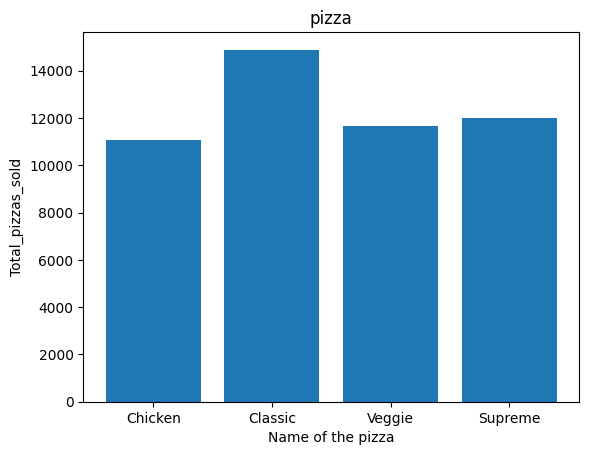

In [6]:
plt.bar(pizza, Total_pizzas_sold)
plt.xlabel('Name of the pizza')
plt.ylabel('Total_pizzas_sold')
plt.title("pizza")
plt.show()

Average order value

In [7]:
con.execute('select  count(distinct order_id) from pizza')

<cx_Oracle.Cursor on <cx_Oracle.Connection to pizza@localhost:1521/xe>>

Total pizza sold

In [20]:
# 3. Total Pizzas Sold : The sum of the quantities of all pizza sold.
Total_Pizzas_Sold = con.execute('SELECT SUM(quantity) AS Total_pizza_sold FROM pizza')
Total_Pizzas_Sold.fetchall()


[(49574,)]

Total Order

In [9]:
con.execute('select count(distinct order_id) as Total_order  from pizza')
total_order = con.fetchall()
for i in total_order:
    print(i)


(21350,)


Average pizza per Order

In [16]:
Average_pizza_per_Order=con.execute('SELECT CAST(CAST(SUM(quantity) AS DECIMAL(10,2))/CAST(COUNT(DISTINCT order_id) AS DECIMAL(10,2)) AS DECIMAL(10,2)) AS Avg_Pizzas_per_order FROM pizza ')

Average_pizza_per_Order.fetchall()

[(2.32,)]